In [26]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib as mpl

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import matplotlib.colors
import numpy as np
import glob
import re 



In [27]:
# file_base = 'data/Fun4All_G4_EICDetector_MaterialScan_'
# file_base = 'data/Fun4All_G4_EICDetector_MaterialScan3_TPCEndCap'
file_base = 'data/Fun4All_G4_EICDetector_MaterialScan3_TPCEndCap'

filenames = glob.glob(os.path.join(f'{file_base}*.log'))
print((filenames))
filenames.sort();

DataSetLables = {
    1: 'TPC EndCap'
};
print(DataSetLables)

CautiousLabel = 'TPC end-cap only'

mpl.style.use('seaborn-talk')

['data/Fun4All_G4_EICDetector_MaterialScan3_TPCEndCap.log']
{1: 'TPC EndCap'}


In [28]:
temp = re.compile("^\s+([-+]?\d*\.?\d*)\s+([-+]?\d*\.?\d*)\s+([-+]?\d*\.?\d*)\s+([-+]?\d*\.?\d*e?[-+]?\d*)\s+([-+]?\d*\.?\d*e?[-+]?\d*)\s*$") 
Setups = [];
Thetas = [];
Phis = [];
Lengths = [];
x0s = [];
lambda0s = [];

for filename in filenames:
    
    filename_base = os.path.basename(filename)
    
#     setupID = int(filename_base.split('.')[0].split('_')[-1]);
    setupID = 1;
    
    if setupID>=10 :
        print(f'Skip {setupID}: {filename}')
        continue;
    
    cnt = 0;
    file1 = open(filename, 'r') 
    Lines = file1.readlines() 
    for line in Lines: 
    #     line = line.strip();  

        match = temp.match(line) 

        if match:
            res = match.groups()
            if (len(res) == 5):

    #             print (line)
    #             print (res)            
                scanData = [float(n) for n in res]

                if (scanData[1]<=360 ):
                    Setups.append(setupID) 
                    Thetas.append(scanData[0]) 
                    Phis.append(scanData[1]) 
                    Lengths.append(scanData[2]) 
                    x0s.append(scanData[3]) 
                    lambda0s.append(scanData[4]) 

                    cnt = cnt +1
                
    print(f'{setupID}: {filename} -> {cnt} records')
    
    


1: data/Fun4All_G4_EICDetector_MaterialScan3_TPCEndCap.log -> 43531 records


In [29]:
df = pd.DataFrame(
    {'Setup':Setups, 
     'Theta':Thetas,
     'Phi': Phis,
     'Length': Lengths,
     'x0':x0s,
     'lambda0':lambda0s,
    });
df.set_index(['Setup','Theta','Phi'], inplace=True)
df.sort_index(level = 2)

df

Length            x0       lambda0
Setup Theta    Phi                                           
1     -88.4453 3.00000    5001.84  7.933950e-25  1.429100e-24
               6.56436    5001.84  7.933950e-25  1.429100e-24
               10.12870   5001.84  7.933950e-25  1.429100e-24
               13.69310   5001.84  7.933950e-25  1.429100e-24
               17.25740   5001.84  7.933950e-25  1.429100e-24
...                           ...           ...           ...
       88.4453 345.17800  5001.84  7.933950e-25  1.429100e-24
               348.74300  5001.84  7.933950e-25  1.429100e-24
               352.30700  5001.84  7.933950e-25  1.429100e-24
               355.87100  5001.84  7.933950e-25  1.429100e-24
               359.43600  5001.84  7.933950e-25  1.429100e-24

[43531 rows x 3 columns]

In [30]:
print(df.index.levels[0].unique())
print(df.index.levels[1].unique())
print(df.index.levels[2].unique())



Int64Index([1], dtype='int64', name='Setup')
Float64Index([-88.4453, -88.4138, -88.3818, -88.3491, -88.3158, -88.2818,
              -88.2471, -88.2117, -88.1755, -88.1387,
              ...
               88.1387,  88.1755,  88.2117,  88.2471,  88.2818,  88.3158,
               88.3491,  88.3818,  88.4138,  88.4453],
             dtype='float64', name='Theta', length=431)
Float64Index([    3.0, 6.56436, 10.1287, 13.6931, 17.2574, 20.8218, 24.3861,
              27.9505, 31.5149, 35.0792,
              ...
              327.356, 330.921, 334.485,  338.05, 341.614, 345.178, 348.743,
              352.307, 355.871, 359.436],
             dtype='float64', name='Phi', length=101)


In [31]:
# ave = df.loc[(9,0),:].mean(axis = 0) 

In [32]:
# x0_avg = df.loc[(9),:].groupby('Theta').x0.mean()

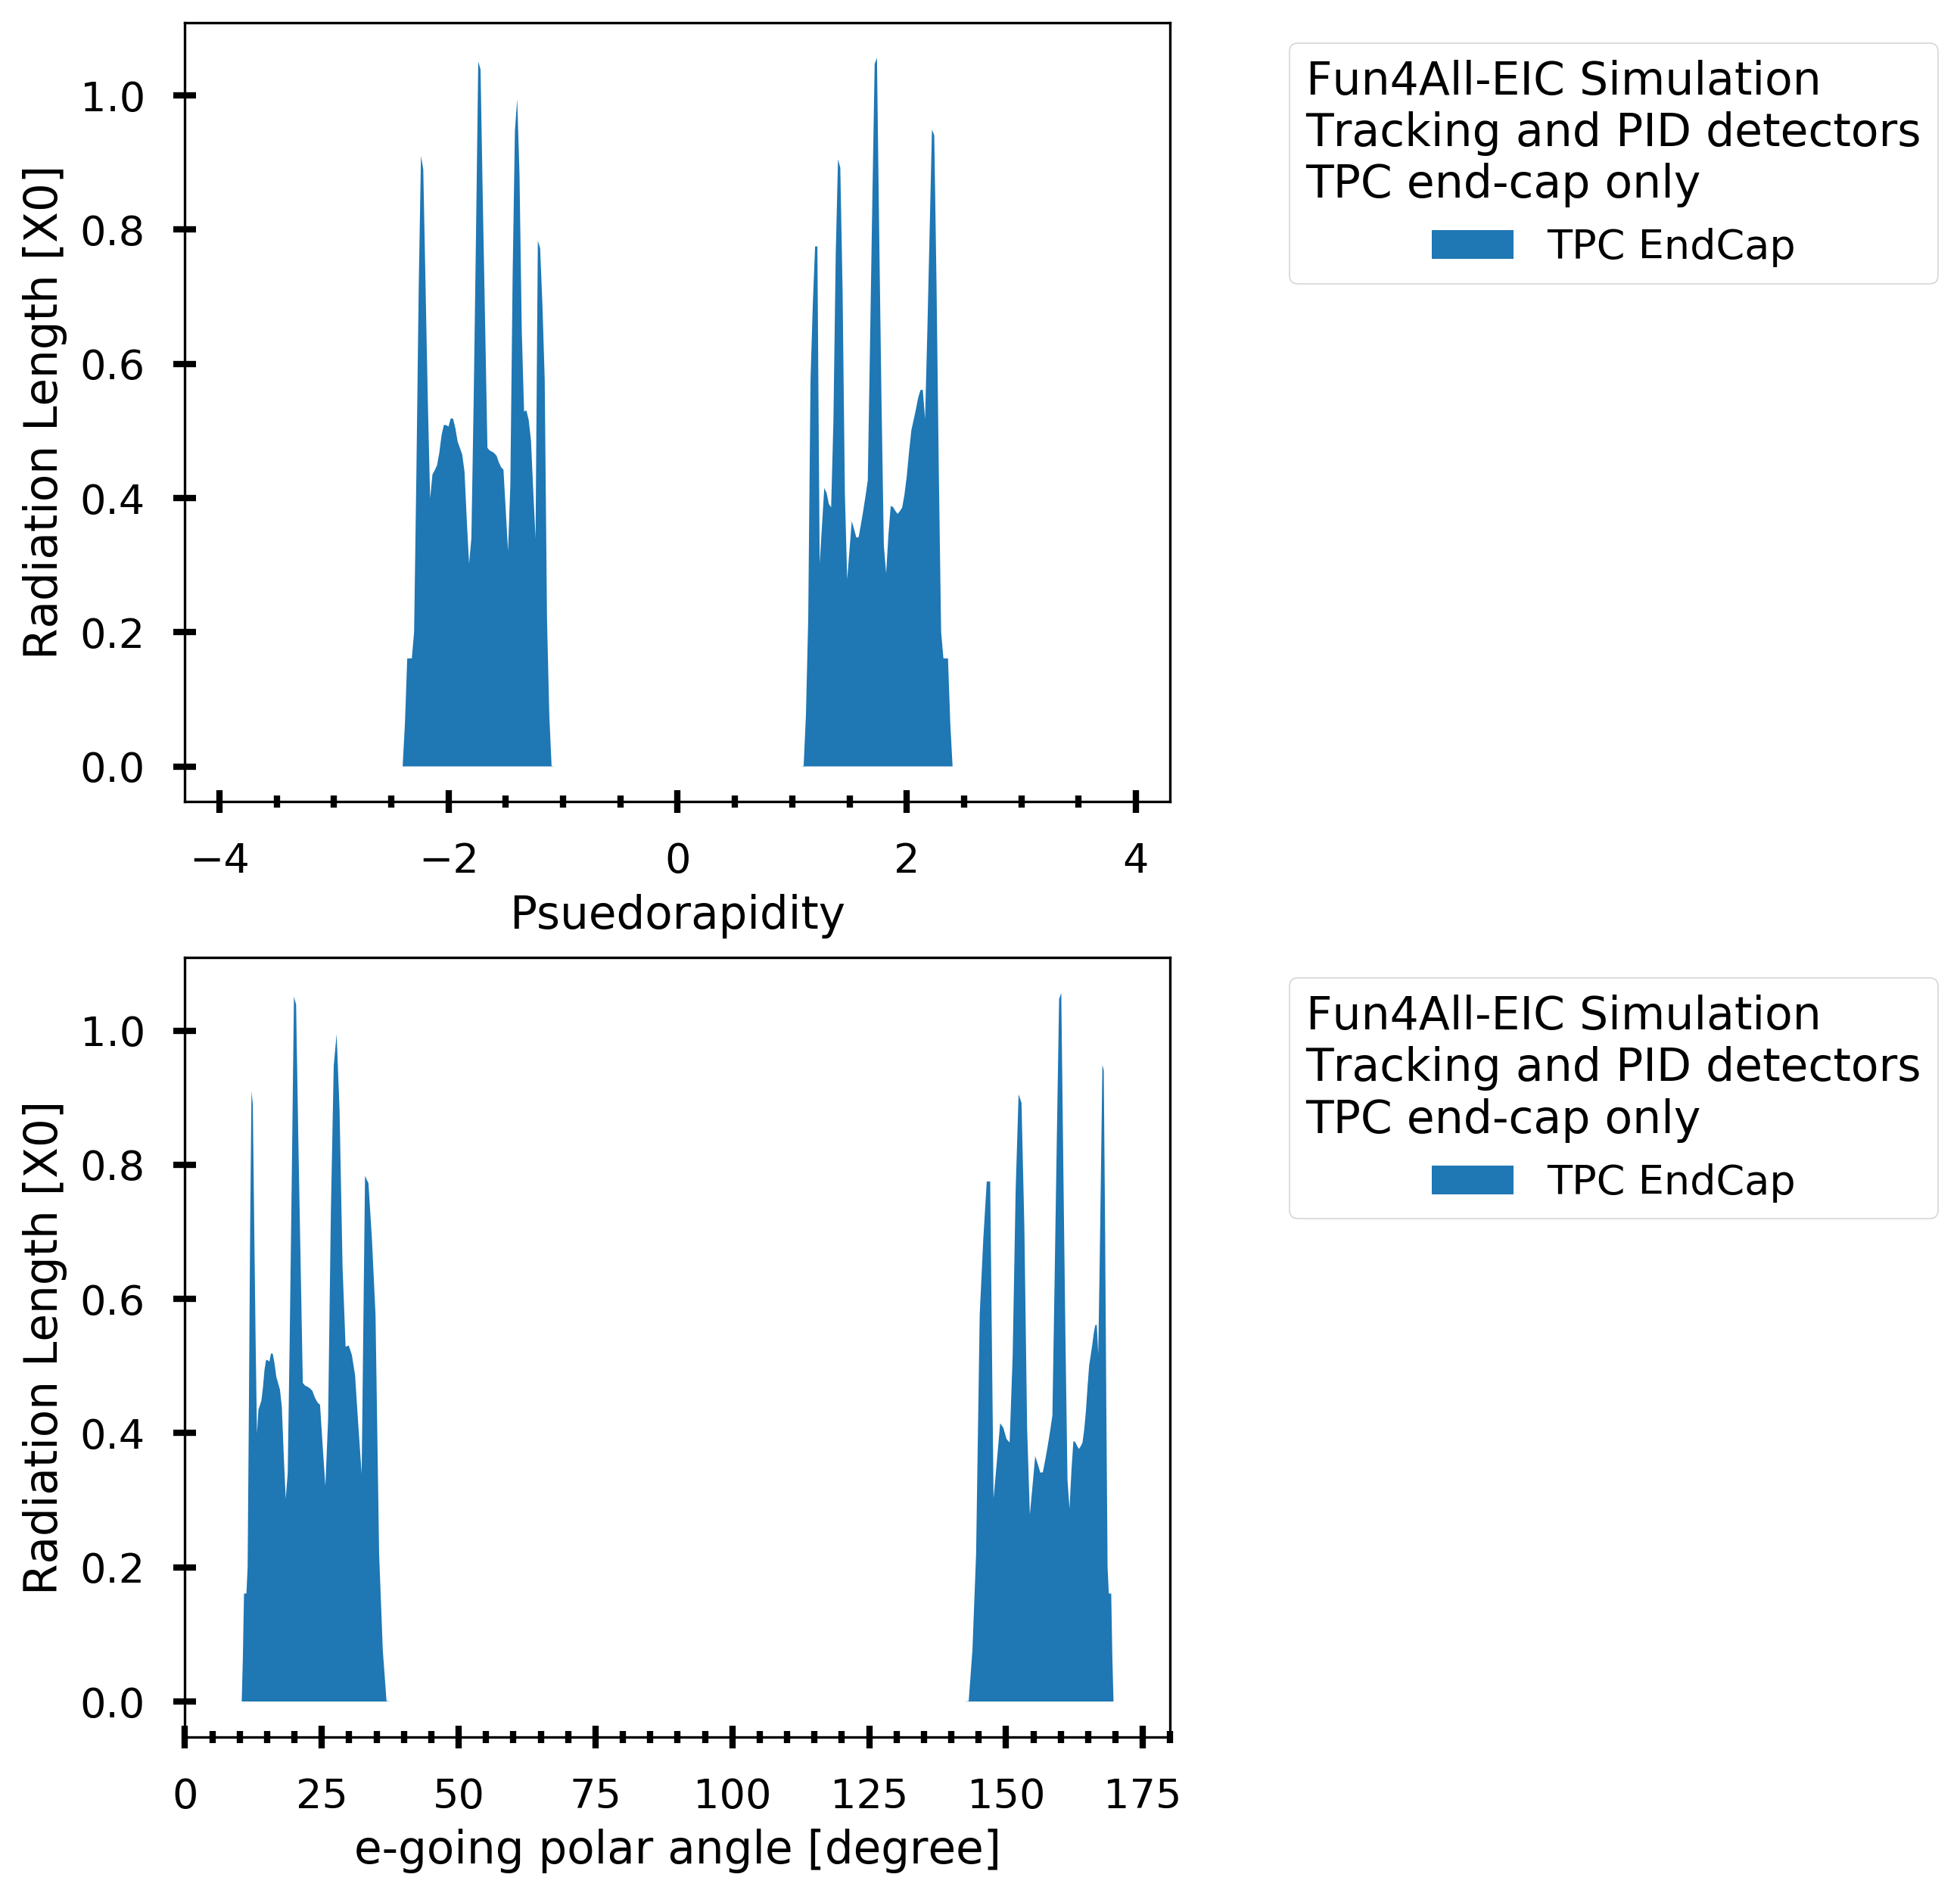

In [33]:
# fig= plt.figure(num=None, figsize=(8, 16), dpi=80, facecolor='w', edgecolor='k')
# ax = fig.add_subplot(1, 1, 1)  # create an axes object in the figure
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 10), dpi=300)



datasets = sorted(df.index.levels[0].unique().to_list(), reverse=True)

for dataset in datasets:
    
    x0_avg = df.loc[(dataset),:].groupby('Theta').x0.mean()
    etas = -np.log(np.tan( ((90-x0_avg.index.to_numpy())/180*np.pi)/2 ))
    polar_angles = 180- ( 90-x0_avg.index.to_numpy() )
    DataSetLable = DataSetLables[dataset]
    
    axs[0].fill_between( etas, 0, x0_avg.to_numpy(), label=DataSetLable)
    
    axs[1].fill_between( polar_angles, 0, x0_avg.to_numpy(), label=DataSetLable)
   

ax=axs[0]
    
# ax.set_title(f'Fun4All-EIC Simulation. Tracking and PID detectors\n{CautiousLabel}')
# ax.set_yscale('log')
ax.set_xlabel("Psuedorapidity")
ax.set_ylabel("Radiation Length [X0]")
ax.set_xlim([-4.3, 4.3]);
# ax.set_ylim([0, 0.4]);

ax.tick_params(which='both',direction='inout');
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)

chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.7, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 1), ncol=1,
         title = f'Fun4All-EIC Simulation\nTracking and PID detectors\n{CautiousLabel}',
         title_fontsize='x-large'
         )

ax=axs[1]
    
# ax.set_title('Raditioan Length Scans')
# ax.set_yscale('log')
ax.set_xlabel("e-going polar angle [degree]")
ax.set_ylabel("Radiation Length [X0]")
ax.set_xlim([0, 180]);
# ax.set_ylim([0, 0.4]);

ax.tick_params(which='both',direction='inout');
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)

chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.7, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 1), ncol=1,
         title = f'Fun4All-EIC Simulation\nTracking and PID detectors\n{CautiousLabel}',
         title_fontsize='x-large'
         )

plt.savefig(os.path.join(f'{file_base}_Raditioan_Length.pdf'), bbox_inches='tight')
plt.savefig(os.path.join(f'{file_base}_Raditioan_Length.png'), bbox_inches='tight')

Processing percentile = 1
Processing percentile = 0.9
Processing percentile = 0.8
Processing percentile = 0.7
Processing percentile = 0.6
Processing percentile = 0


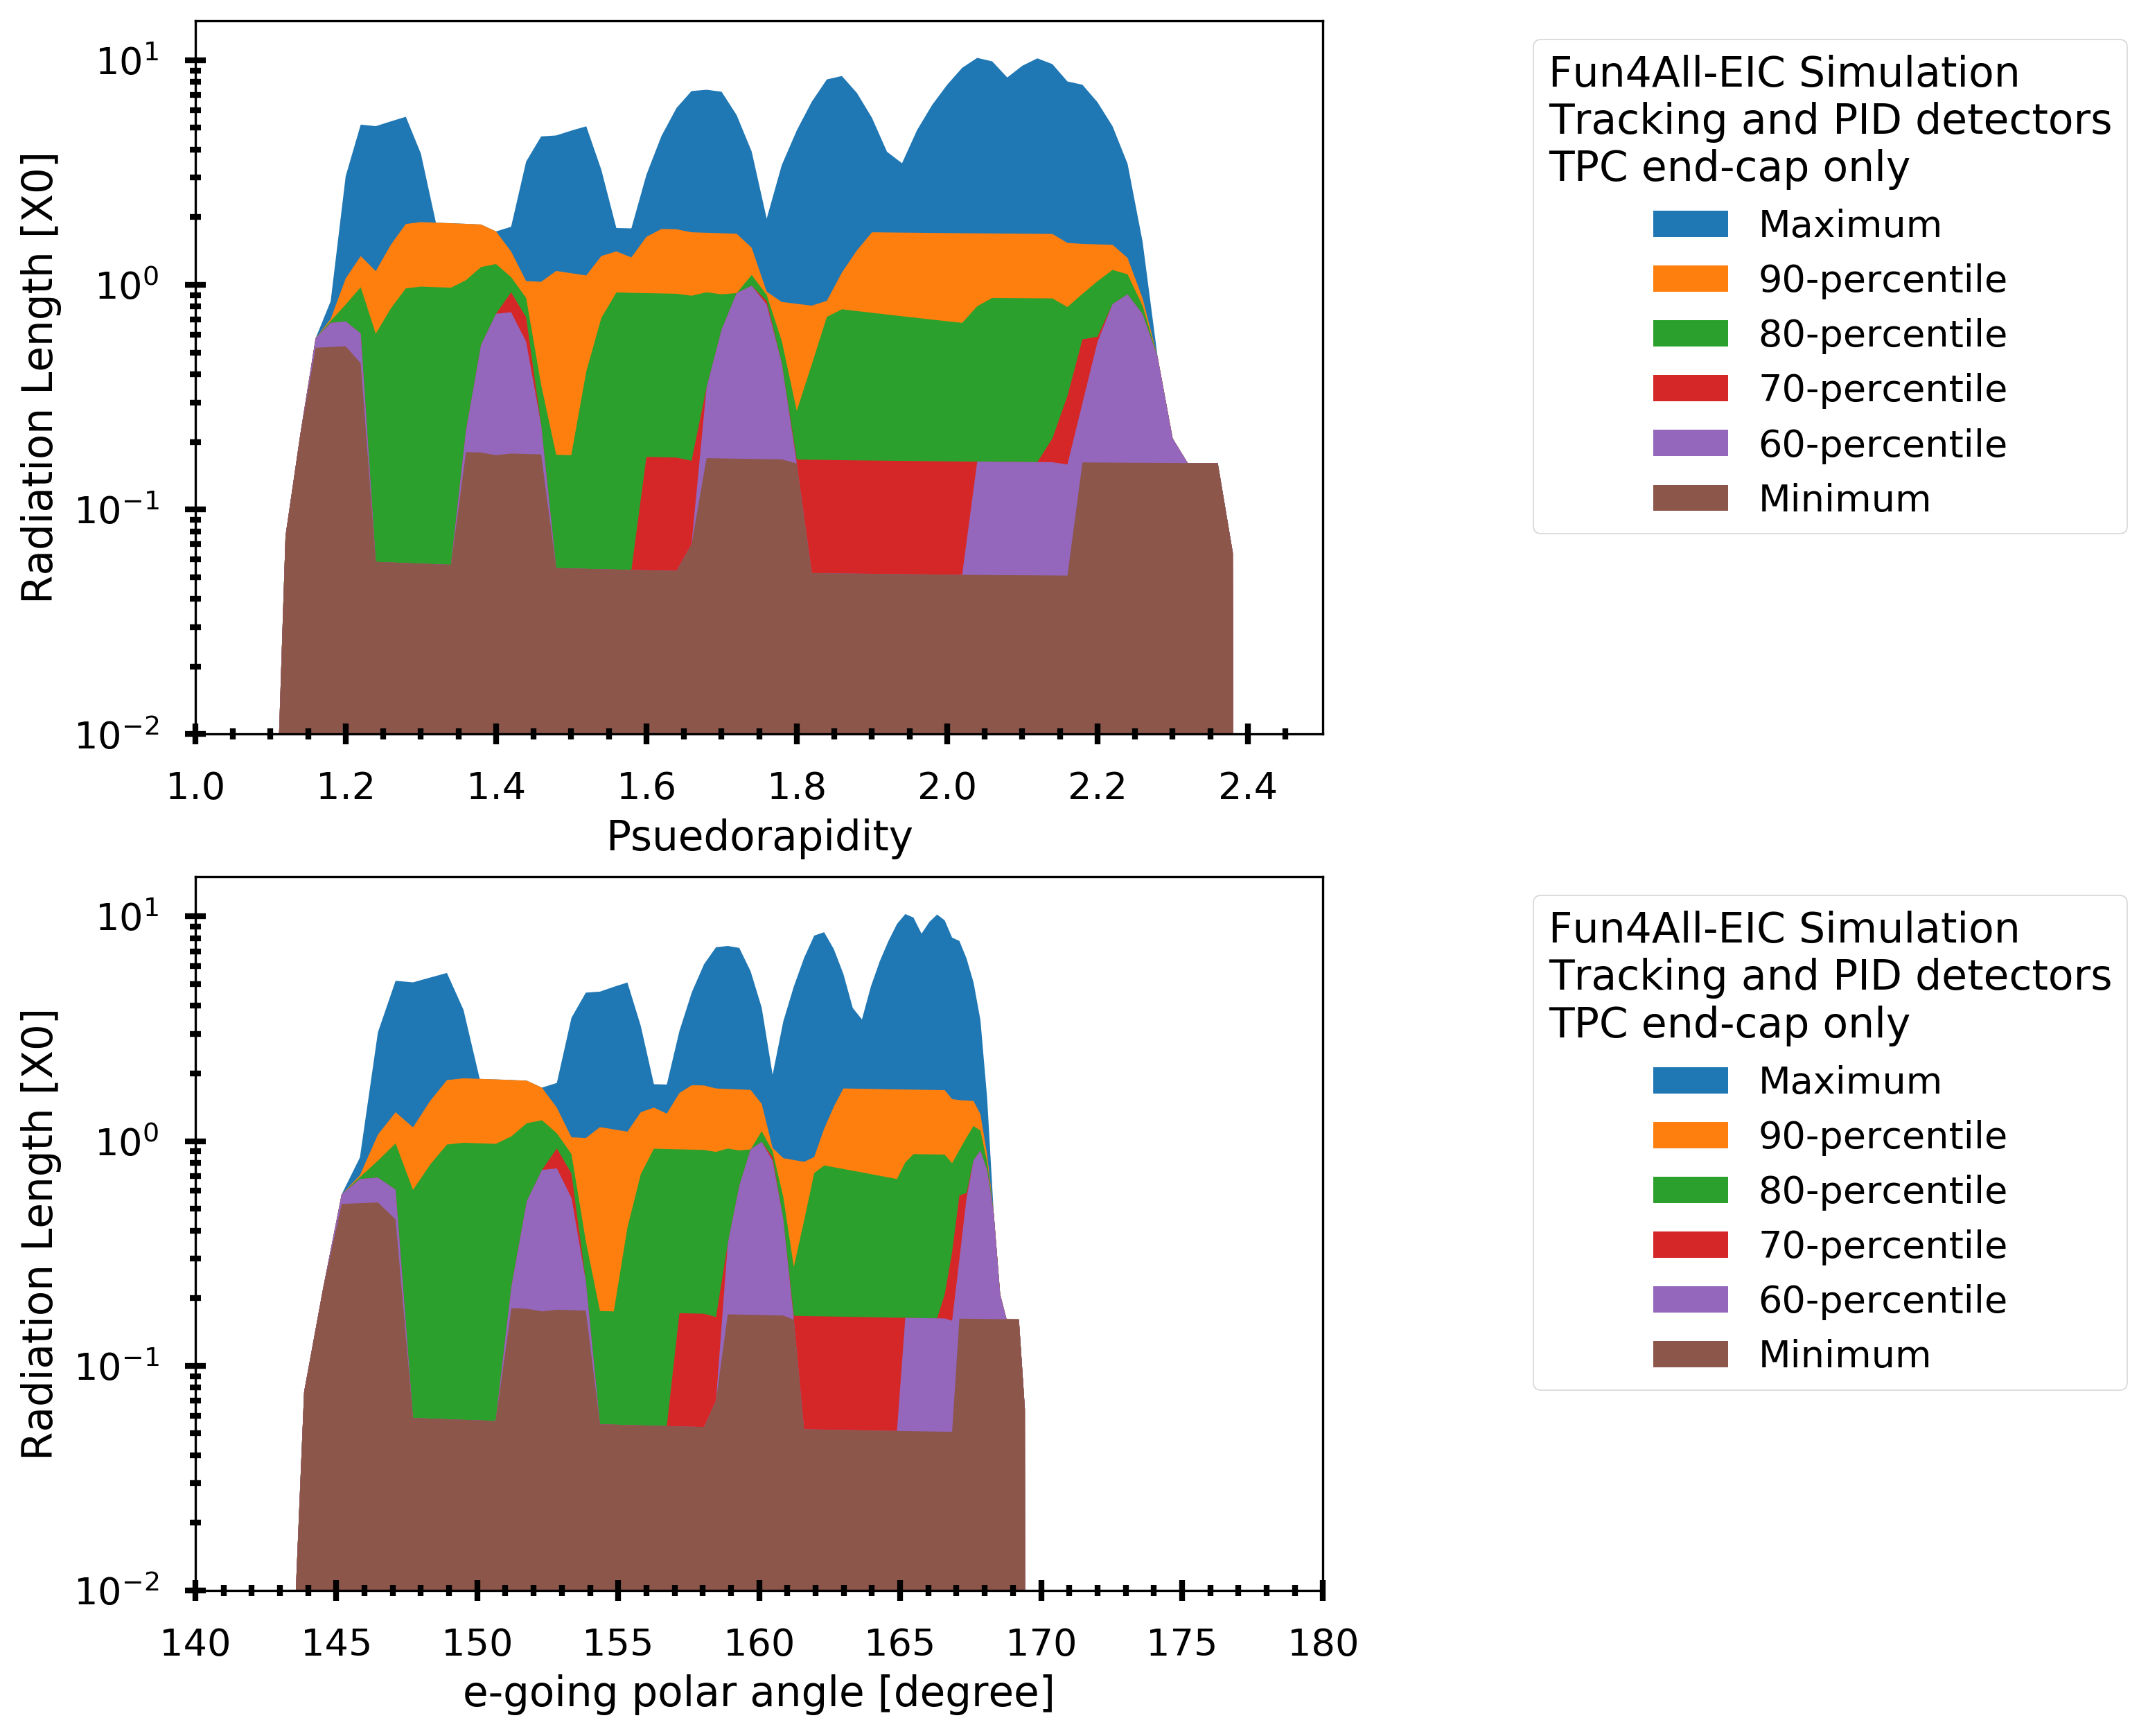

In [34]:
# fig= plt.figure(num=None, figsize=(8, 16), dpi=80, facecolor='w', edgecolor='k')
# ax = fig.add_subplot(1, 1, 1)  # create an axes object in the figure
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), dpi=300)



datasets = sorted(df.index.levels[0].unique().to_list(), reverse=True)

for dataset in datasets:
    
    etas = -np.log(np.tan( ((90-x0_avg.index.to_numpy())/180*np.pi)/2 ))
    polar_angles = 180- ( 90-x0_avg.index.to_numpy() )
    DataSetLable = DataSetLables[dataset]
    
    
    x0_series =df.loc[(dataset),:].groupby('Theta').x0
    
    x0_avg = x0_series.mean()
    
    x0_dict = {0 :  x0_series.min(), 1: x0_series.max()}
    
    scanlist = [.6, .7,.8,.9]
    plotlist = scanlist
    plotlist.insert(0,0)
    plotlist.append(1)
    plotlist.reverse()
    
    for percentile in scanlist:
#         percentile = index *1./10.
        print (f'Processing percentile = {percentile}')
        x0_dict[percentile] = x0_series.quantile(percentile);
    
    for percentile in plotlist:
        label = "%.0f-percentile" % (percentile*100)
        if percentile == 0:
            label = 'Minimum'
        if percentile == 1:
            label = 'Maximum'
        
        axs[0].fill_between( etas, 0, x0_dict[percentile], label=label)
        axs[1].fill_between( polar_angles, 0, x0_dict[percentile], label=label)

        
        
ax=axs[0]
    
# ax.set_title(f'Fun4All-EIC Simulation. Tracking and PID detectors\n{CautiousLabel}')
ax.set_yscale('log')
ax.set_xlabel("Psuedorapidity")
ax.set_ylabel("Radiation Length [X0]")
# ax.set_xlim([-4.3, 4.3]);
ax.set_xlim([1, 2.5]);
ax.set_ylim([1e-2, 15]);

ax.tick_params(which='both',direction='inout');
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)

chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.7, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 1), ncol=1,
         title = f'Fun4All-EIC Simulation\nTracking and PID detectors\n{CautiousLabel}',
         title_fontsize='x-large'
         )

ax=axs[1]
    
# ax.set_title('Raditioan Length Scans')
ax.set_yscale('log')
ax.set_xlabel("e-going polar angle [degree]")
ax.set_ylabel("Radiation Length [X0]")
ax.set_xlim([140, 180]);
ax.set_ylim([1e-2, 15]);

ax.tick_params(which='both',direction='inout');
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)

chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.7, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 1), ncol=1,
         title = f'Fun4All-EIC Simulation\nTracking and PID detectors\n{CautiousLabel}',
         title_fontsize='x-large'
         )

plt.savefig(os.path.join(f'{file_base}_Raditioan_Length.pdf'), bbox_inches='tight')
plt.savefig(os.path.join(f'{file_base}_Raditioan_Length.png'), bbox_inches='tight')

In [35]:
import pickle
with open(os.path.join(f'{file_base}_Raditioan_Length.pickle'), 'wb') as handle:
    pickle.dump(x0_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
print(f'Saved to {file_base}_Raditioan_Length.pickle')

Saved to data/Fun4All_G4_EICDetector_MaterialScan3_TPCEndCap_Raditioan_Length.pickle


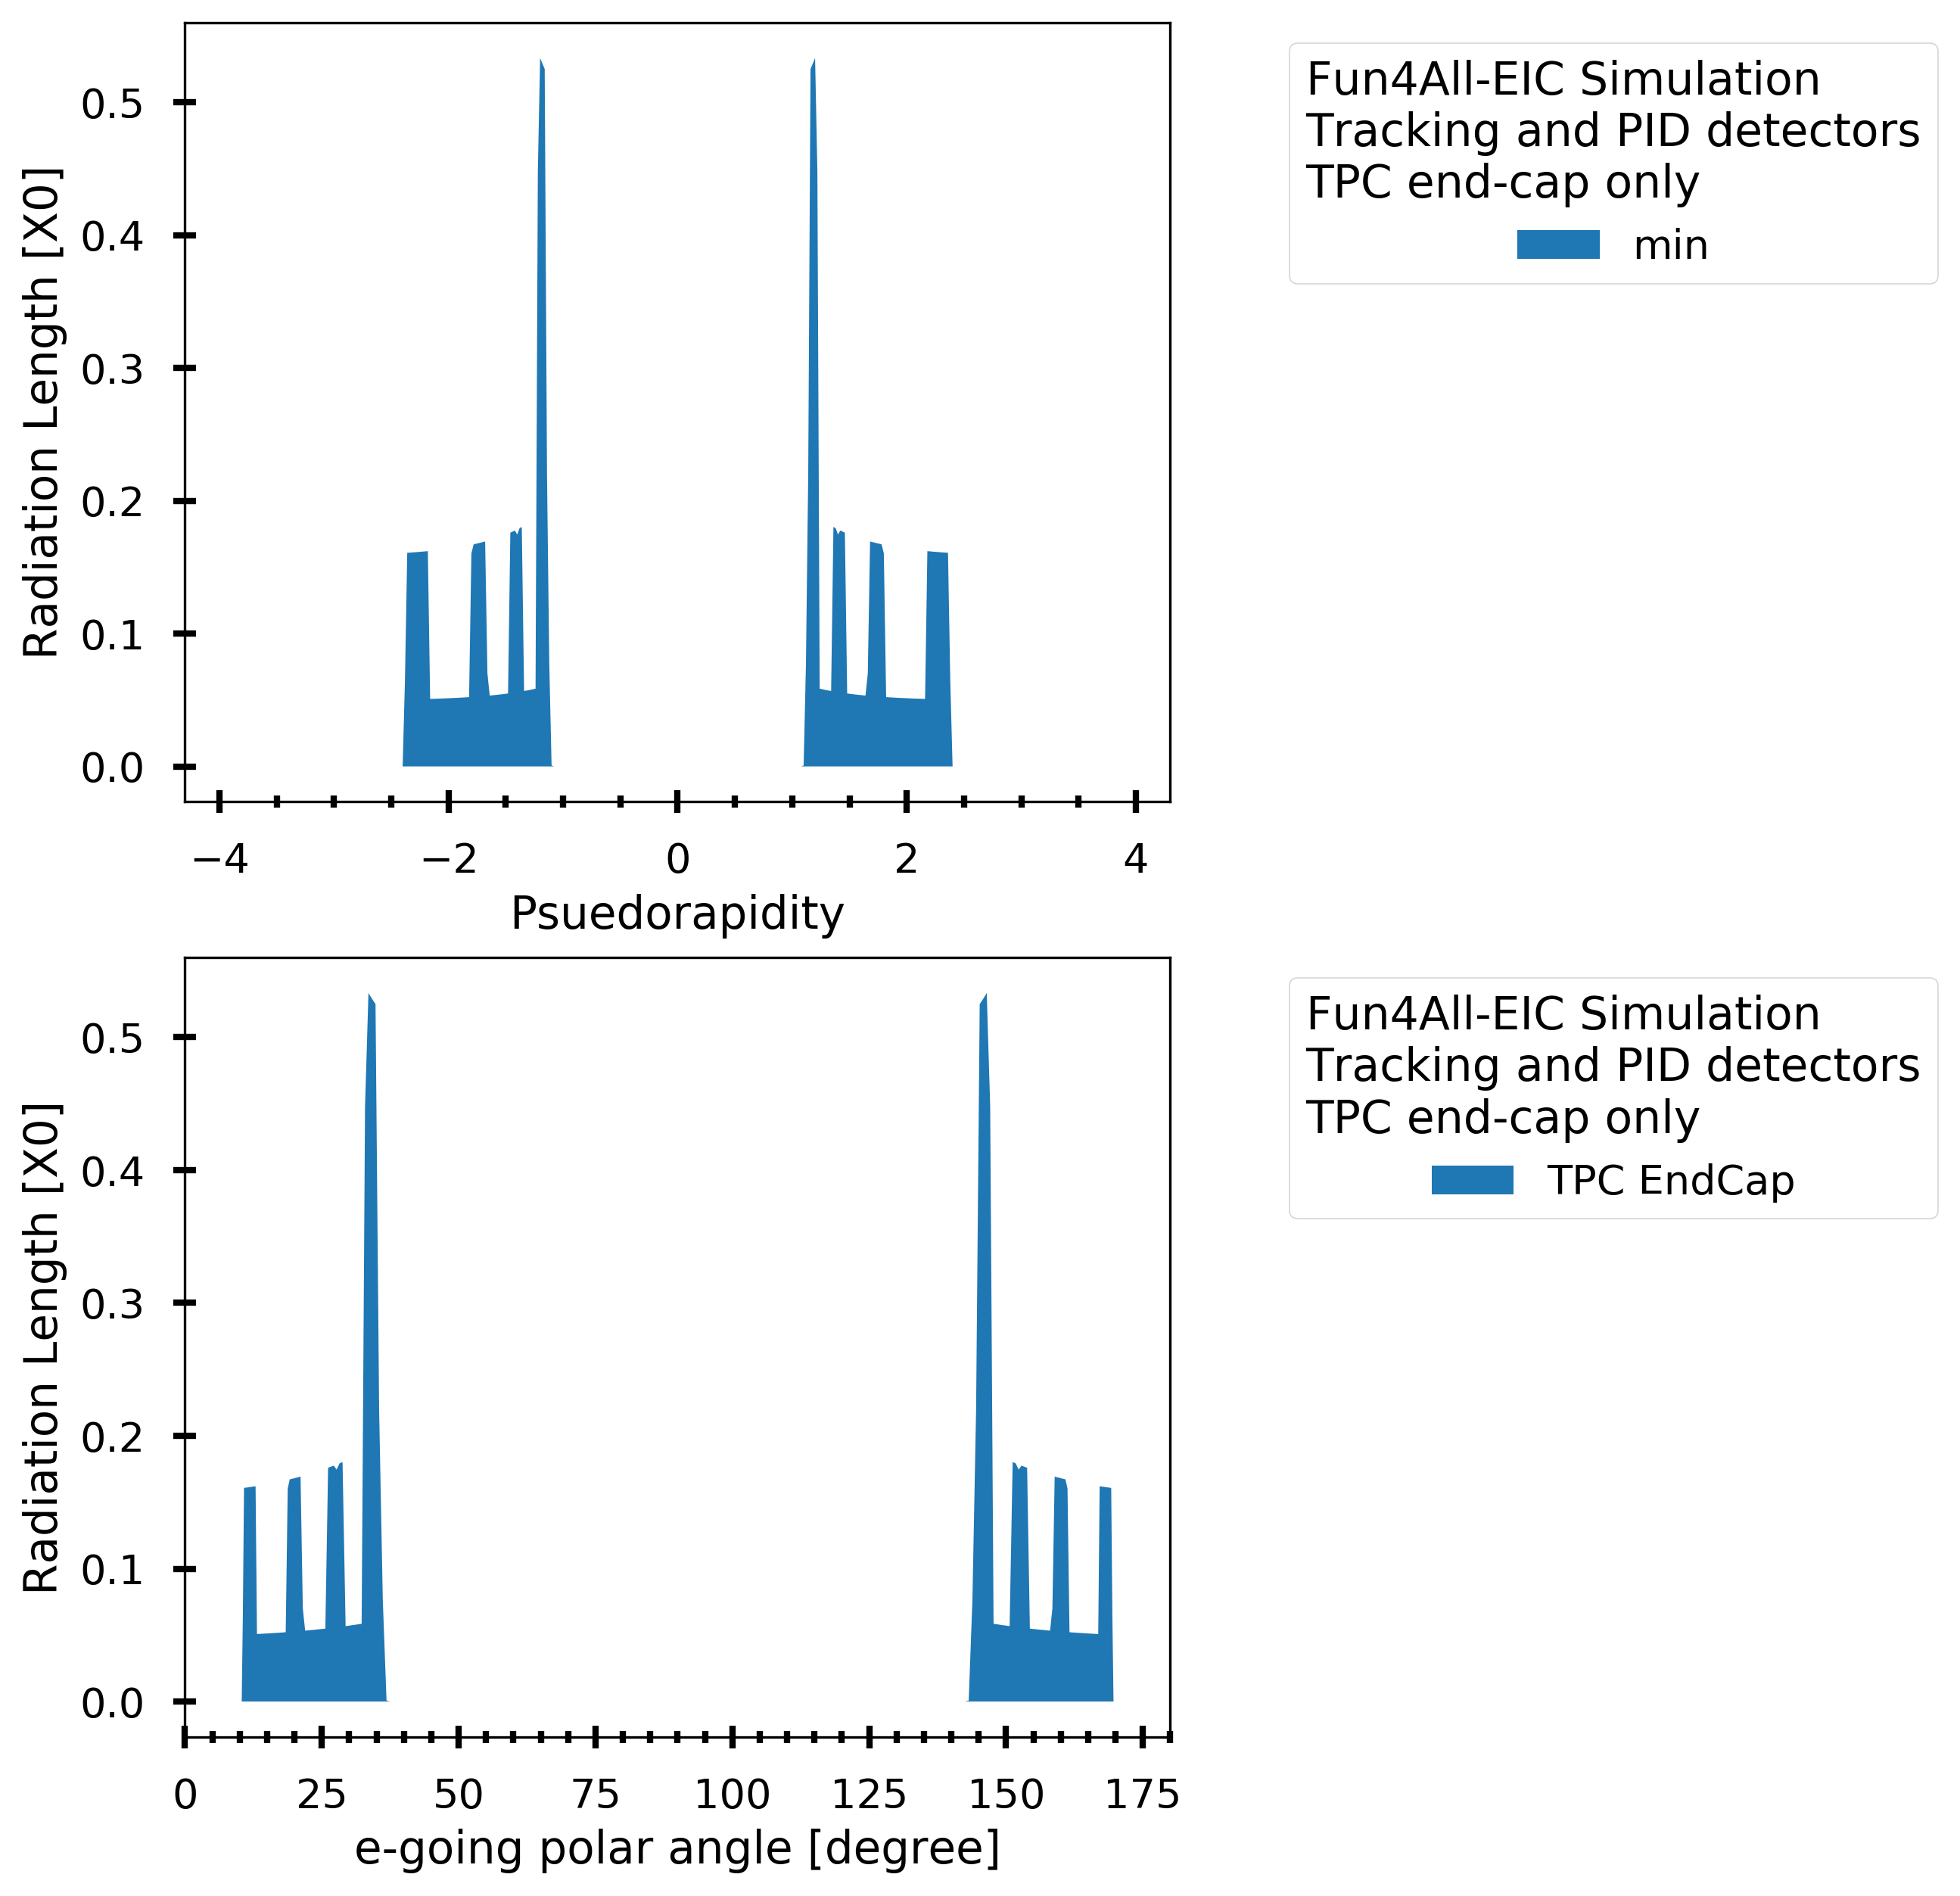

In [36]:
# fig= plt.figure(num=None, figsize=(8, 16), dpi=80, facecolor='w', edgecolor='k')
# ax = fig.add_subplot(1, 1, 1)  # create an axes object in the figure
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 10), dpi=300)



datasets = sorted(df.index.levels[0].unique().to_list(), reverse=True)

for dataset in datasets:
    
    etas = -np.log(np.tan( ((90-x0_avg.index.to_numpy())/180*np.pi)/2 ))
    polar_angles = 180- ( 90-x0_avg.index.to_numpy() )
    DataSetLable = DataSetLables[dataset]
    
    
    x0_series =df.loc[(dataset),:].groupby('Theta').x0
    
    x0_avg = x0_series.mean()    
    
    x0_min = x0_series.min()
    x0_max = x0_series.max()
#     x0_quanties = x0_series.quantile(np.linspace(.1,.9,9))
    
    axs[0].fill_between( etas, 0, x0_min.to_numpy(), label='min')
#     axs[0].fill_between( etas, 0, x0_max.to_numpy(), label='max')
    
    axs[1].fill_between( polar_angles, 0, x0_min.to_numpy(), label=DataSetLable)
   

ax=axs[0]
    
# ax.set_title(f'Fun4All-EIC Simulation. Tracking and PID detectors\n{CautiousLabel}')
# ax.set_yscale('log')
ax.set_xlabel("Psuedorapidity")
ax.set_ylabel("Radiation Length [X0]")
ax.set_xlim([-4.3, 4.3]);
# ax.set_ylim([0, 0.4]);

ax.tick_params(which='both',direction='inout');
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)

chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.7, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 1), ncol=1,
         title = f'Fun4All-EIC Simulation\nTracking and PID detectors\n{CautiousLabel}',
         title_fontsize='x-large'
         )

ax=axs[1]
    
# ax.set_title('Raditioan Length Scans')
# ax.set_yscale('log')
ax.set_xlabel("e-going polar angle [degree]")
ax.set_ylabel("Radiation Length [X0]")
ax.set_xlim([0, 180]);
# ax.set_ylim([0, 0.4]);

ax.tick_params(which='both',direction='inout');
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)

chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.7, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 1), ncol=1,
         title = f'Fun4All-EIC Simulation\nTracking and PID detectors\n{CautiousLabel}',
         title_fontsize='x-large'
         )

plt.savefig(os.path.join(f'{file_base}_Raditioan_Length.pdf'), bbox_inches='tight')
plt.savefig(os.path.join(f'{file_base}_Raditioan_Length.png'), bbox_inches='tight')

In [37]:
x0_dict.keys()

dict_keys([0, 1, 0.9, 0.8, 0.7, 0.6])

In [38]:
dir(ax)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_convert_dx',
 '_current_image',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_clipping_extent_bbox',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_in_layout',
 '_init_axis',
 '_label',
 '_layoutbox',
 '_left_title',
 '_make_twin_axes',
 '_